<a href="https://colab.research.google.com/github/TrinhBaThinh-257275/BTVN-AI/blob/nopbai/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Face/

/content/drive/MyDrive/Colab Notebooks/BTVN/Face


In [3]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 

In [4]:
train=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Face/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 135 images belonging to 3 classes.


In [5]:
test = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Face/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [6]:
train.class_indices

{'Minh': 0, 'Thanh': 1, 'Thinh': 2}

In [7]:
test.class_indices

{'Minh': 0, 'Thanh': 1, 'Thinh': 2}

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=20,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
5/5 [==============================] - 88s 16s/step - loss: 20.3953 - accuracy: 0.4296 - val_loss: 0.9518 - val_accuracy: 0.6667
Epoch 2/20
5/5 [==============================] - 32s 6s/step - loss: 0.8004 - accuracy: 0.6296 - val_loss: 0.6585 - val_accuracy: 0.6889
Epoch 3/20
5/5 [==============================] - 29s 6s/step - loss: 0.5020 - accuracy: 0.7778 - val_loss: 0.2161 - val_accuracy: 0.8889
Epoch 4/20
5/5 [==============================] - 31s 6s/step - loss: 0.0753 - accuracy: 0.9630 - val_loss: 0.0697 - val_accuracy: 0.9556
Epoch 5/20
5/5 [==============================] - 31s 6s/step - loss: 0.2729 - accuracy: 0.9185 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 29s 7s/step - loss: 3.9690 - accuracy: 0.7704 - val_loss: 2.5238 - val_accuracy: 0.3333
Epoch 7/20
5/5 [==============================] - 31s 6s/step - loss: 1.0206 - accuracy: 0.7185 - val_loss: 0.0784 - val_accuracy: 1.0000
Epoch 8/20
5/5 [================

In [10]:
model.save("Face.h5")

In [11]:
model_CNN=load_model('Face.h5')

1/1 [==============================] - 0s 251ms/step
Thanh


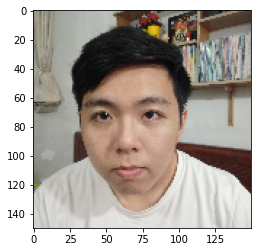

1/1 [==============================] - 0s 60ms/step
Thinh


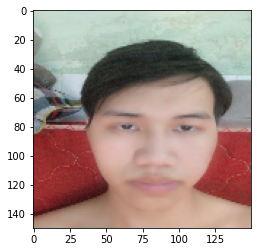

1/1 [==============================] - 0s 61ms/step
Minh


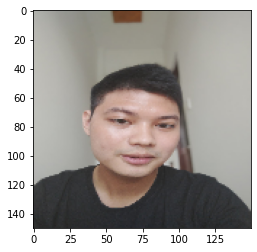

In [12]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Face/Attempt"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Minh'
  if round(result[0][1])==1:
    prediction='Thanh'
  if round(result[0][2])==1:
    prediction='Thinh'
  print(prediction)
  plt.show()

In [13]:
!jupyter nbconvert --to html "/content/Untitled0.ipynb"

[NbConvertApp] Converting notebook /content/Untitled0.ipynb to html
[NbConvertApp] Writing 581092 bytes to /content/Untitled0.html
